In [59]:
! pip install pandas numpy
! pip install matplotlib
! pip install mplfinance 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [61]:
# Read the CSV data
df = pd.read_csv('Stock_daily_price.csv', parse_dates=['Ngày'], dayfirst=True)
df.set_index('Ngày', inplace=True)
print("Loaded Data:")
print(df)

Loaded Data:
                HSG      BVS      DCM      PNJ      VND
Ngày                                                   
2024-11-06  20350.0  41200.0  37200.0  94300.0  14700.0
2024-11-05  20000.0  40000.0  36300.0  93500.0  14350.0
2024-11-04  19950.0  40200.0  36100.0  92700.0  14300.0
2024-11-01  20200.0  40100.0  36850.0  91400.0  14350.0
2024-10-31  20250.0  40700.0  37550.0  94800.0  14550.0
...             ...      ...      ...      ...      ...
2020-01-20   5988.5   8093.0   5910.0  64743.5   8491.6
2020-01-17   6089.5   8093.0   5920.0  63828.6   8461.9
2020-01-16   6147.2   8093.0   5970.0  63265.6   8372.8
2020-01-15   6096.7   8258.1   5970.0  63336.0   8491.6
2020-01-14   5844.2   8258.1   6000.0  62561.9   8491.6

[1203 rows x 5 columns]


In [62]:
# Resample the data to monthly frequency by taking the last available price in each month
df_monthly = df.resample('M').last()
print("\nAggregated Monthly Data:")
print(df_monthly)


Aggregated Monthly Data:
                HSG      BVS      DCM       PNJ      VND
Ngày                                                    
2020-01-31   5880.2   8588.5   5910.0   59324.7   8550.9
2020-02-29   5483.4   7762.6   6080.0   57495.0   3397.1
2020-03-31   3282.8   6523.9   5310.0   33005.1   2855.0
2020-04-30   5568.2   7184.6   8460.0   40914.8   2650.2
2020-05-31   7553.0   7762.6   8490.0   45373.0   2915.3
2020-06-30   8674.2   8010.4   7646.9   41274.3   3180.3
2020-07-31   7197.0   7432.3   7090.4   37103.8   3078.9
2020-08-31   8560.6   9001.4   8338.0   43143.9   2845.9
2020-09-30  11856.1  10074.9  10635.7   43791.1   3262.9
2020-10-31  11363.6   8970.0  11230.6   49975.0   3937.6
2020-11-30  13636.4   9867.0  11230.6   56015.2   4195.2
2020-12-31  16780.3  16415.2  13212.5   58693.0   6636.2
2021-01-31  17689.4  14710.9  12032.8   60215.0   7102.4
2021-02-28  20075.8  19285.6  12740.6   61519.0   6746.6
2021-03-31  21515.1  20092.9  16468.4   61406.1   7249.5
2021-

C:\Users\Owner\AppData\Local\Temp\ipykernel_13800\807786182.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').last()


In [63]:
# Calculate percentage change to get monthly returns
monthly_returns = df_monthly.pct_change().dropna()
print("\nMonthly Returns:")
print(monthly_returns)


Monthly Returns:
                 HSG       BVS       DCM       PNJ       VND
Ngày                                                        
2020-02-29 -0.067481 -0.096163  0.028765 -0.030842 -0.602720
2020-03-31 -0.401320 -0.159573 -0.126645 -0.425948 -0.159577
2020-04-30  0.696174  0.101274  0.593220  0.239651 -0.071734
2020-05-31  0.356453  0.080450  0.003546  0.108963  0.100030
2020-06-30  0.148444  0.031922 -0.099305 -0.090333  0.090900
2020-07-31 -0.170298 -0.072169 -0.072775 -0.101044 -0.031884
2020-08-31  0.189468  0.211119  0.175956  0.162789 -0.075676
2020-09-30  0.384961  0.119259  0.275570  0.015001  0.146527
2020-10-31 -0.041540 -0.109669  0.055934  0.141214  0.206779
2020-11-30  0.200007  0.100000  0.000000  0.120864  0.065421
2020-12-31  0.230552  0.663646  0.176473  0.047805  0.581855
2021-01-31  0.054177 -0.103825 -0.089287  0.025932  0.070251
2021-02-28  0.134906  0.310973  0.058823  0.021656 -0.050096
2021-03-31  0.071693  0.041860  0.292592 -0.001835  0.074541
2021-0

In [64]:
# Step 4: Calculate Mean Returns and Covariance Matrix
mean_returns = monthly_returns.mean()
cov_matrix = monthly_returns.cov()
print("\nMean Monthly Returns:")
print(mean_returns)

print("\nCovariance Matrix:")
print(cov_matrix)


Mean Monthly Returns:
HSG    0.038115
BVS    0.039364
DCM    0.042826
PNJ    0.013325
VND    0.029598
dtype: float64

Covariance Matrix:
          HSG       BVS       DCM       PNJ       VND
HSG  0.035687  0.016335  0.018979  0.009169  0.016261
BVS  0.016335  0.026969  0.012287  0.003021  0.018153
DCM  0.018979  0.012287  0.023861  0.004719  0.011100
PNJ  0.009169  0.003021  0.004719  0.009635  0.002914
VND  0.016261  0.018153  0.011100  0.002914  0.038656


In [65]:
# Step 5: Define Portfolio Performance Function
def portfolio_performance(weights, mean_returns, cov_matrix):
    """
    Calculate portfolio return and standard deviation.
    
    Parameters:
    - weights: Portfolio weights
    - mean_returns: Mean returns of assets
    - cov_matrix: Covariance matrix of asset returns
    
    Returns:
    - std: Portfolio standard deviation
    - returns: Portfolio return
    """
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return std, returns

In [66]:
# Step 6: Generate Random Portfolios
num_portfolios = 1000
results = np.zeros((3, num_portfolios))
weights_record = []

num_assets = len(df_monthly.columns)
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = ({
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
})

for i in range(num_portfolios):
    # Random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    portfolio_std, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0, i] = portfolio_std
    results[1, i] = portfolio_return
    results[2, i] = portfolio_return / portfolio_std  # Sharpe Ratio (assuming risk-free rate = 0)

# Convert results to DataFrame
results_df = pd.DataFrame(results.T, columns=['std_dev', 'returns', 'sharpe_ratio'])

Text(0.5, 1.0, 'Efficient Frontier with Random Portfolios')

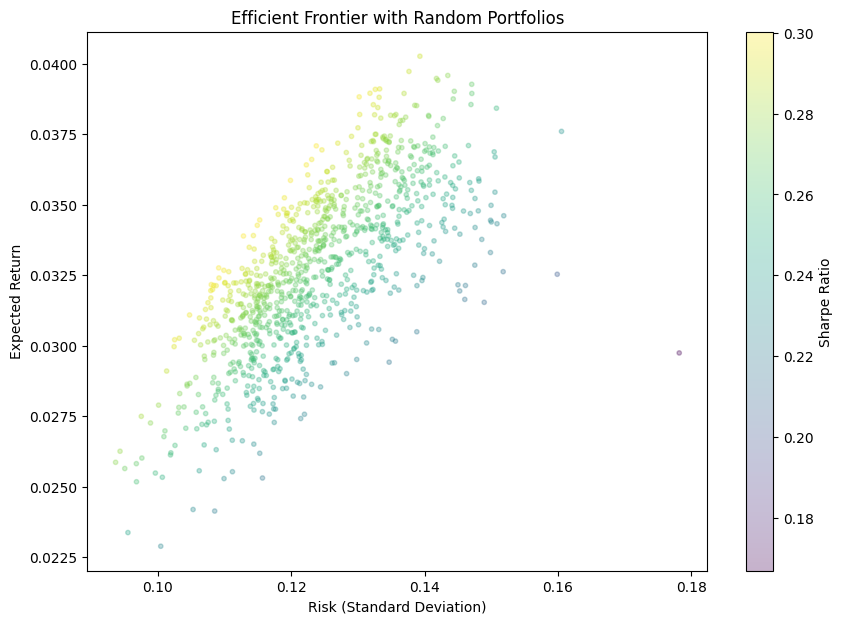

In [67]:
# Step 7: Plot Random Portfolios
plt.figure(figsize=(10, 7))
scatter = plt.scatter(results_df.std_dev, results_df.returns, c=results_df.sharpe_ratio, cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Random Portfolios')

In [68]:
# Step 8: Define Optimization Function to Minimize Variance
def minimize_variance(target_return, mean_returns, cov_matrix):
    """
    Find the portfolio with the minimum variance for a given target return.
    
    Parameters:
    - target_return: Desired portfolio return
    - mean_returns: Mean returns of assets
    - cov_matrix: Covariance matrix of asset returns
    
    Returns:
    - Optimization result containing the optimal weights
    """
    num_assets = len(mean_returns)
    
    # Constraints: Sum of weights is 1, portfolio return equals target_return
    constraints = ({
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    },
    {
        'type': 'eq',
        'fun': lambda x: np.dot(x, mean_returns) - target_return
    })
    
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # Initial guess: equal distribution
    initial_guess = num_assets * [1. / num_assets,]
    
    result = minimize(lambda x: np.dot(x.T, np.dot(cov_matrix, x)),
                      initial_guess,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    
    return result

In [69]:
# Step 9: Generate Efficient Frontier
target_returns = np.linspace(results_df.returns.min(), results_df.returns.max(), 100)
efficient_portfolios = []

for target in target_returns:
    efficient_portfolio = minimize_variance(target, mean_returns, cov_matrix)
    if efficient_portfolio.success:
        std, ret = portfolio_performance(efficient_portfolio.x, mean_returns, cov_matrix)
        efficient_portfolios.append((std, ret))

efficient_portfolios = np.array(efficient_portfolios)

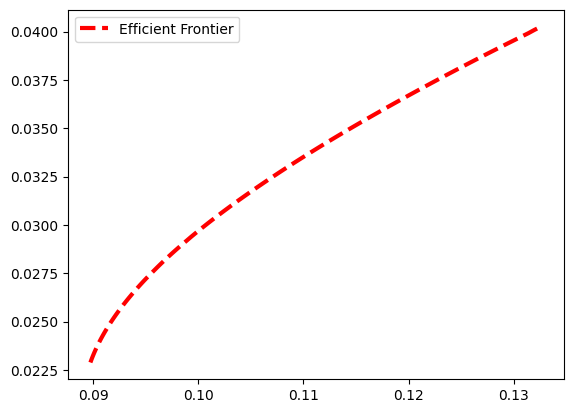

In [70]:
# Step 10: Plot Efficient Frontier
plt.plot(efficient_portfolios[:,0], efficient_portfolios[:,1], 'r--', linewidth=3, label='Efficient Frontier')
plt.legend()
plt.show()

In [71]:
# Step 10: Identify the Tangency Portfolio
risk_free_rate = 0.0020

# Calculate Sharpe Ratios for Efficient Frontier portfolios
sharpe_ratios = (efficient_portfolios[:,1] - risk_free_rate) / efficient_portfolios[:,0]

# Find the index of the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(sharpe_ratios)
tangency_std, tangency_ret = efficient_portfolios[max_sharpe_idx]

print(f"\nTangency Portfolio - Return: {tangency_ret:.4f}, Risk: {tangency_std:.4f}, Sharpe Ratio: {sharpe_ratios[max_sharpe_idx]:.4f}")


Tangency Portfolio - Return: 0.0376, Risk: 0.1232, Sharpe Ratio: 0.2893


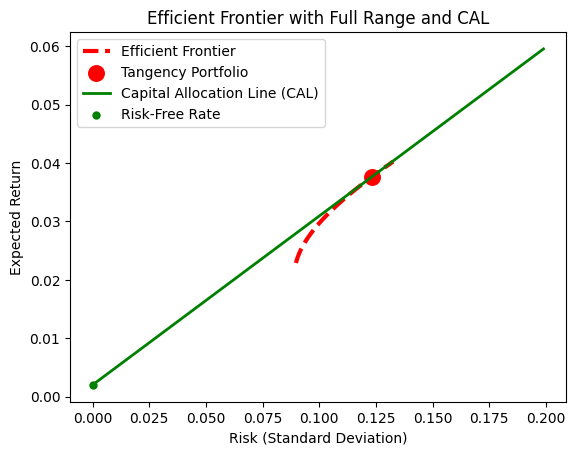

In [72]:
# Step 11: Plot the Full Efficient Frontier and CAL

# Plot the Efficient Frontier
plt.plot(efficient_portfolios[:,0], efficient_portfolios[:,1], 'r--', linewidth=3, label='Efficient Frontier')

# Plot the Tangency Portfolio
plt.scatter(tangency_std, tangency_ret, color='red', marker='.', s=500, label='Tangency Portfolio')

# Plot the Capital Allocation Line (CAL)
# CAL is the line from the risk-free rate to the tangency portfolio and beyond
max_sharpe_ratio = sharpe_ratios[max_sharpe_idx]
cal_x = np.linspace(0, max(efficient_portfolios[:,0]) * 1.5, 100)
cal_y = risk_free_rate + max_sharpe_ratio * cal_x
plt.plot(cal_x, cal_y, 'g-', linewidth=2, label='Capital Allocation Line (CAL)')

# Plot the risk-free rate
plt.scatter(0, risk_free_rate, color='green', marker='.', s=100, label='Risk-Free Rate')

# Enhance the plot with labels and legend
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Full Range and CAL')
plt.legend()

# Display the plot
plt.show()

In [73]:
# Step 12: Display the Tangency Portfolio Weights
def get_tangency_weights(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    
    # Objective function: Maximize Sharpe Ratio
    def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
        p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
        return -(p_ret - risk_free_rate) / p_var
    
    constraints = ({
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    })
    
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    initial_guess = num_assets * [1. / num_assets,]
    
    result = minimize(neg_sharpe_ratio, initial_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    
    return result.x if result.success else None

# Get tangency portfolio weights
tangency_weights = get_tangency_weights(mean_returns, cov_matrix, risk_free_rate)
if tangency_weights is not None:
    print("\nTangency Portfolio Weights:")
    for stock, weight in zip(df_monthly.columns, tangency_weights):
        print(f"{stock}: {weight:.2%}")
else:
    print("Optimization failed to find the tangency portfolio.")


Tangency Portfolio Weights:
HSG: 0.00%
BVS: 33.15%
DCM: 52.99%
PNJ: 13.86%
VND: 0.00%
